Attribute Information:
   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)


In [32]:
%pylab inline
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize
names=['Class_Name', 'handicapped-infants', 'water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
data=pd.read_csv(fileURL, names=names,header=None)
data.replace({'?':np.nan},inplace=True)
data = data.dropna()
data.replace({'y':1,'n':0,'democrat':1,'republican':0},inplace=True)
X = data[['handicapped-infants', 'water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']]
Y = data[['Class_Name']]
x_train, x_test, y_train, y_test= train_test_split(X,Y,train_size=0.5)

print("training set x's length" , len(x_train))
print("training set y's length" , len(y_train))
print("testing set x's length", len(x_test))
print("testing set y's length", len(y_test))





Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


training set x's length 116
training set y's length 116
testing set x's length 116
testing set y's length 116


In [33]:
data[:5]

,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train, y_train)

In [35]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1])

In [36]:
y_pred_prob = clf.predict_proba(x_test)
y_pred_prob_class1 = y_pred_prob[:, 1]
y_pred_prob_class1

array([ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [38]:
#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9568965517241379

In [39]:
#calculate precision, recall, fscore
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.96969696969696972, 0.95522388059701491, 0.96240601503759393, None)

In [40]:
#calculate and print classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.94      0.96      0.95        49
    class 1       0.97      0.96      0.96        67

avg / total       0.96      0.96      0.96       116



In [41]:
#calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP,TN,FP,FN

(64, 47, 2, 3)

[ 0.          0.04081633  1.        ]
[ 0.          0.95522388  1.        ]


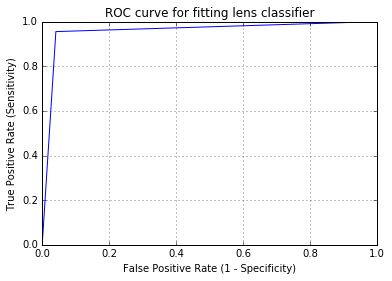

In [44]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_class1)
plt.plot(fpr1, tpr1)
print(fpr1)
print(tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fitting lens classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)